In [1]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 686.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1634
            Open  High   Low  Close  Volume Ticker
Time                                              
2017-06-02  3410  3440  3290   3320    2580    VIB
2017-06-05  3320  3410  3290   3290   39900    VIB
2017-06-06  3310  3320  3290   3320   53340    VIB
2017-06-07  3420  3420  3310   3340   69855    VIB
2017-06-08  3310  3310  3290   3310   50310    VIB
2017-06-09  3290  3310  3290   3290   43100    VIB


<Axes: xlabel='Time'>

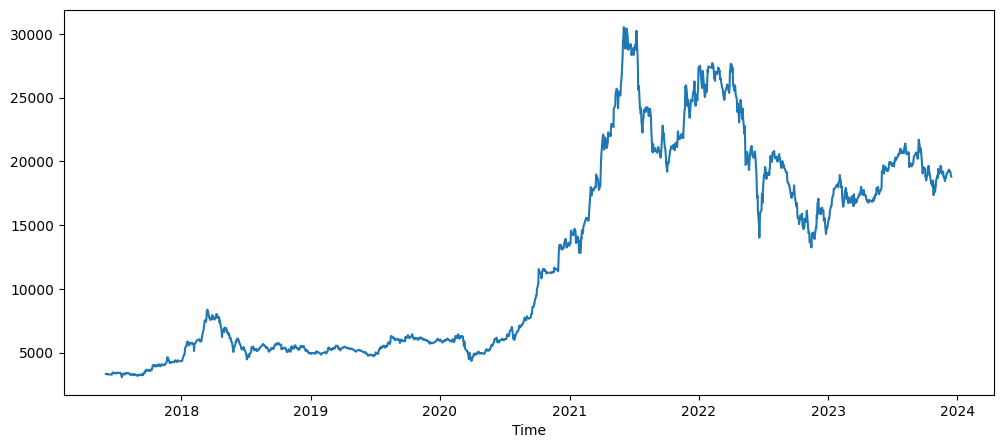

In [3]:
# Import data
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
print(pd.DataFrame(SSI.head(6)))
train_dates = SSI.index
plt.figure(figsize=(12, 5))
SSI["Close"].plot()

In [4]:
SSI = SSI.reset_index(drop = True)
df = SSI['Close']
df

0        3320
1        3290
2        3320
3        3340
4        3310
        ...  
1629    19200
1630    19200
1631    19050
1632    18900
1633    18800
Name: Close, Length: 1634, dtype: int64

In [5]:
from PyEMD import EMD, CEEMDAN

In [6]:
#ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
ceemdan = CEEMDAN(epsilon=0.005, range_thr = 0.005)
ceemdan.noise_seed(seed = 1)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [7]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8
0,2.780031,-2.732754,22.214991,-47.229770,27.050379,-149.581458,1635.946301,1831.552280
1,-27.451767,-4.706262,27.827947,-50.943944,28.047929,-150.586341,1637.056601,1830.755838
2,7.892371,-10.748725,31.257995,-54.125058,29.195239,-151.790206,1638.316782,1830.001603
3,10.938342,9.354548,29.936012,-56.555056,30.506185,-153.197488,1639.727890,1829.289566
4,-1.470256,0.219365,22.105010,-57.945390,31.992350,-154.811560,1641.290767,1828.619715
...,...,...,...,...,...,...,...,...
1629,-56.137564,103.762682,334.606901,-222.699496,-794.028210,3458.128828,-4573.726156,20950.093014
1630,42.588898,47.816702,298.820595,-240.344247,-776.739740,3455.090799,-4570.032136,20942.799129
1631,16.436069,-18.692220,242.725192,-250.107783,-761.421994,3451.743009,-4566.127765,20935.445491
1632,-16.504213,-72.726877,175.736122,-252.399767,-748.209836,3448.086050,-4562.013523,20928.032044


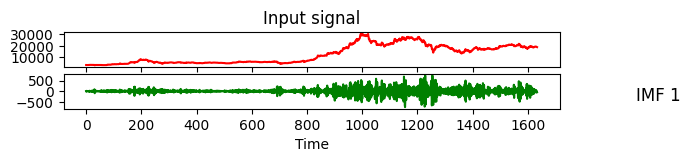

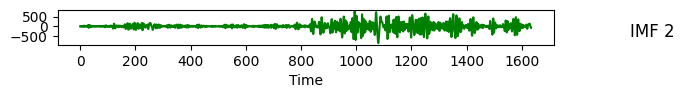

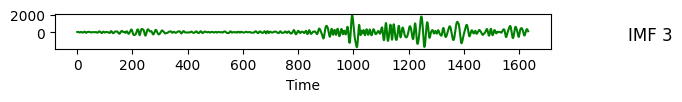

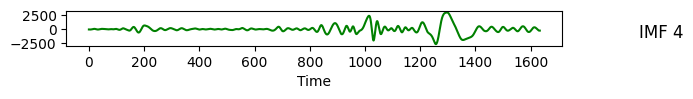

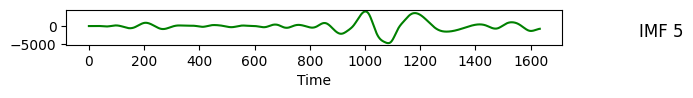

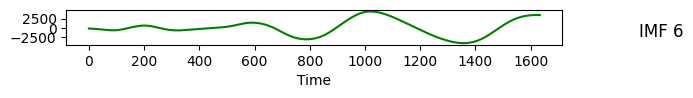

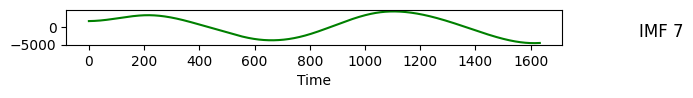

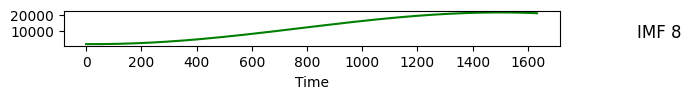

In [8]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [9]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1634, 1)
Residue: (1634, 1)


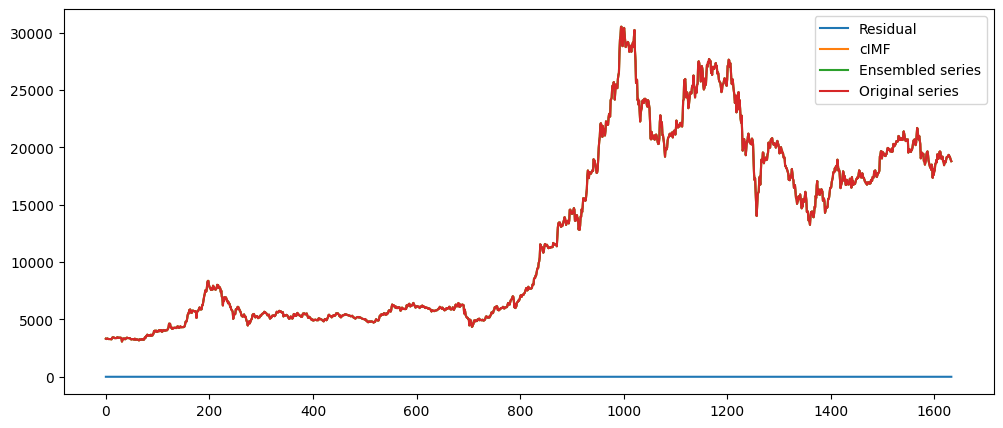

In [10]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

In [11]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [12]:
# Scale data to 0-1
scaler = MinMaxScaler(feature_range=(0,1))
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
cIMFs_t = cIMFs.T
IMFscale = Scaling(cIMFs_t)

(1634, 8)
Train:  (1307, 8)
Test:  (327, 8)


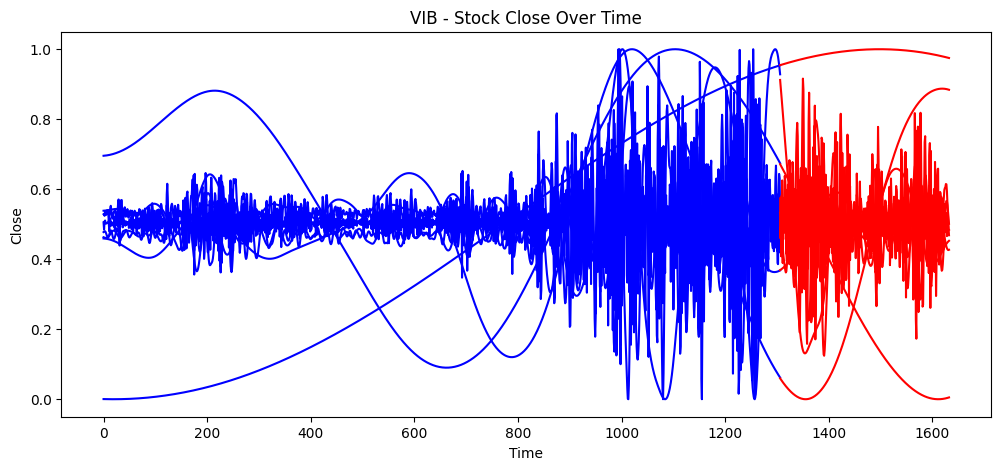

In [13]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.8*IMFscale.shape[0])
test_size = int(0.2*IMFscale.shape[0])
train_data = IMFscale[:train_size]
test_data = IMFscale[train_size:]

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b')
plt.plot(range(train_size-1,  train_size+test_size), test_data, linestyle='-',  color='r')

plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

In [14]:
# Train X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly

trainX = []
trainY = []

n_past = 30
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])

print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1277, 30, 8)
Y train:  (1277, 8)


In [15]:
# Test X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)
testY = testY.reshape(testY.shape[0], testY.shape[2])

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (297, 30, 8)
Y test:  (297, 8)


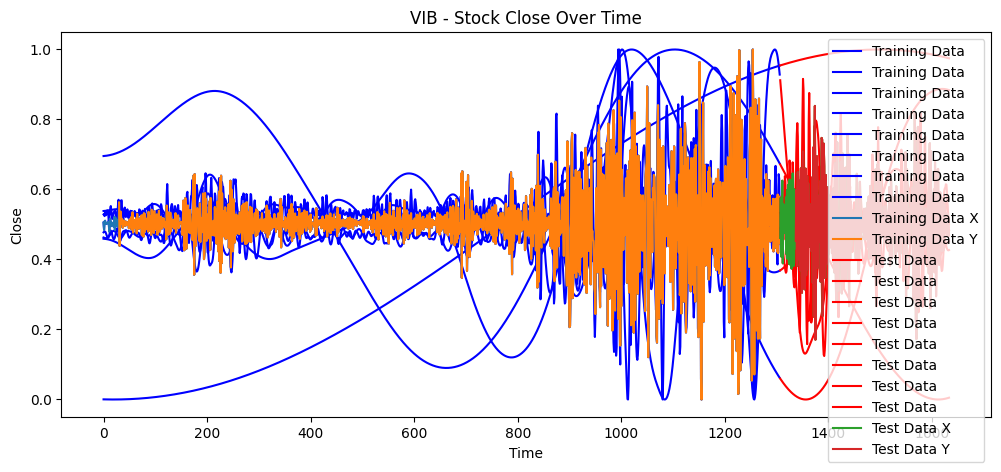

In [16]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [37]:
# Tạo model lstm cho việc training
## kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),
               ##bias_regularizer=l2(0.01),
model = Sequential()
model.add(LSTM(80, activation='relu',

               input_shape=(trainX.shape[1], trainX.shape[2]),

               return_sequences=True))
model.add(LSTM(40, activation='relu',

               return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainX.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 80)            28480     
                                                                 
 lstm_9 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 328       
                                                                 
Total params: 48168 (188.16 KB)
Trainable params: 48168 (188.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(trainX, trainY,epochs = 50, batch_size = 4, validation_split = 0.2, verbose=1)

Epoch 1/50
256/256 [==============================] - 8s 22ms/step - loss: 0.0429 - val_loss: 0.0485
Epoch 2/50
256/256 [==============================] - 7s 27ms/step - loss: 0.0154 - val_loss: 0.0390
Epoch 3/50
256/256 [==============================] - 5s 21ms/step - loss: 0.0118 - val_loss: 0.0471
Epoch 4/50
256/256 [==============================] - 7s 26ms/step - loss: 0.0102 - val_loss: 0.0340
Epoch 5/50
256/256 [==============================] - 5s 21ms/step - loss: 0.0084 - val_loss: 0.0358
Epoch 6/50
256/256 [==============================] - 6s 23ms/step - loss: 0.0075 - val_loss: 0.0394
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 0.0073 - val_loss: 0.0412
Epoch 8/50
256/256 [==============================] - 5s 21ms/step - loss: 0.0067 - val_loss: 0.0410
Epoch 9/50
256/256 [==============================] - 7s 27ms/step - loss: 0.0064 - val_loss: 0.0401
Epoch 10/50
256/256 [==============================] - 5s 21ms/step - loss: 0.0060 - val_lo

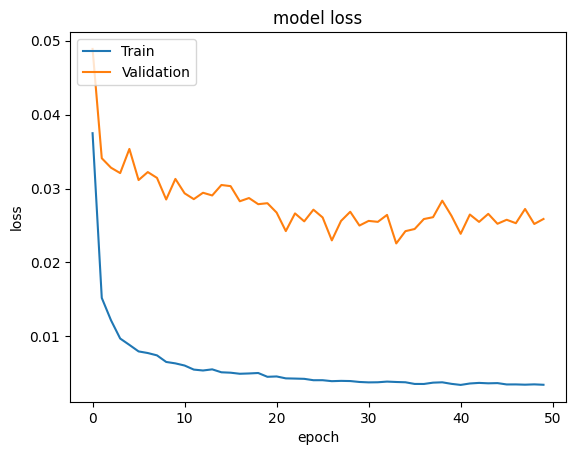

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
testY.shape

(297, 8)

In [23]:
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
print(prediction_copies.shape)
y_pred_future = scaler.inverse_transform(prediction)[:]
print(y_pred_future.shape)

10/10 [==============================] - 0s 10ms/step
(297, 64)
(297, 8)


In [25]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [26]:
train_sum = train_back.sum(axis = 1).reshape(-1, 1)
test_sum = test_back.sum(axis = 1).reshape(-1, 1)
pred_sum = y_pred_future.sum(axis=1).reshape(-1, 1)


print (train_sum.shape)
print(test_sum.shape)
print(pred_sum.shape)
print(pred_sum)

(1307, 1)
(327, 1)
(297, 1)
[[11908.172 ]
 [11849.76  ]
 [11774.074 ]
 [12017.8955]
 [12320.418 ]
 [12311.545 ]
 [12286.408 ]
 [12418.255 ]
 [12621.957 ]
 [12693.552 ]
 [13055.115 ]
 [13156.667 ]
 [13361.417 ]
 [13687.233 ]
 [13766.964 ]
 [13505.304 ]
 [13235.421 ]
 [12880.97  ]
 [12841.918 ]
 [12672.413 ]
 [12589.981 ]
 [12620.102 ]
 [12811.668 ]
 [12974.644 ]
 [13170.104 ]
 [13241.096 ]
 [13249.303 ]
 [13282.493 ]
 [13222.311 ]
 [13109.534 ]
 [12929.093 ]
 [12756.164 ]
 [12712.169 ]
 [12649.779 ]
 [12926.556 ]
 [12929.402 ]
 [13386.101 ]
 [13364.762 ]
 [12989.52  ]
 [13304.73  ]
 [13474.408 ]
 [13123.938 ]
 [12783.728 ]
 [12924.717 ]
 [12840.65  ]
 [12881.819 ]
 [12796.134 ]
 [12748.787 ]
 [12402.913 ]
 [12303.607 ]
 [12085.989 ]
 [11983.917 ]
 [12086.6455]
 [12461.512 ]
 [12883.628 ]
 [13081.576 ]
 [13176.576 ]
 [13226.109 ]
 [13200.811 ]
 [12944.424 ]
 [12771.6045]
 [12731.986 ]
 [12627.8545]
 [12394.281 ]
 [12303.283 ]
 [12338.031 ]
 [12206.78  ]
 [12119.031 ]
 [12116.541 ]
 [1196

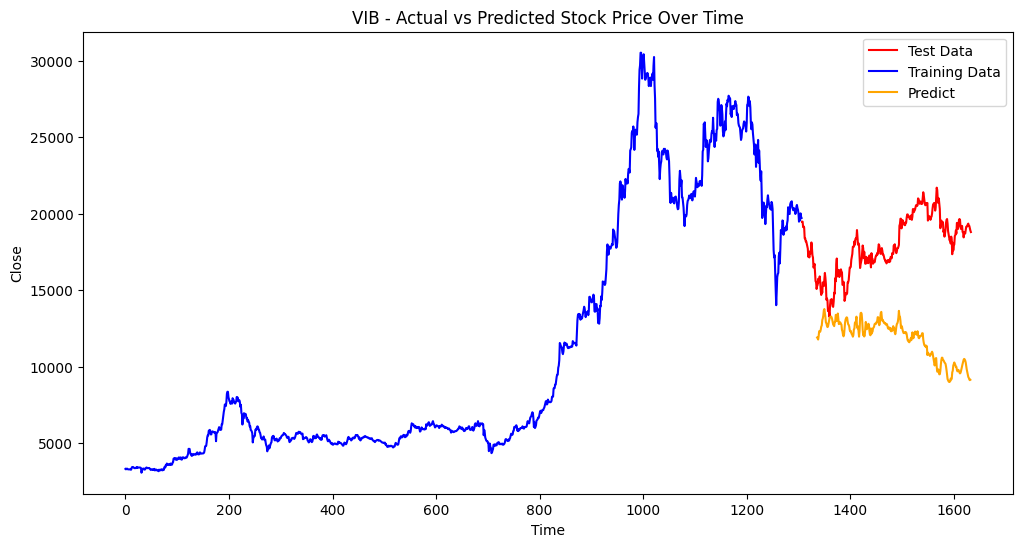

In [27]:
plt.figure(figsize=(12, 6))
n_future = 30

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [28]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data
print("Test: ", test_for_forecast.shape)

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-15):])
  print("X shape:",x.shape)
  x = x.reshape(1, x.shape[0], x.shape[1])
  print("X reshape: ",x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  print("Y shape:", y.shape)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  #y_c = np.repeat(y, train_data.shape[1], axis=-1)
  #print("Y copied:",y_c.shape)
  y_pr = scaler.inverse_transform(y)[:]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1, 8)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

Test:  (327, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 292ms/step
Y shape: (1, 8)
(328, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 8)
(329, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 24ms/step
Y shape: (1, 8)
(330, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 24ms/step
Y shape: (1, 8)
(331, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 24ms/step
Y shape: (1, 8)
(332, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 24ms/step
Y shape: (1, 8)
(333, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 37ms/step
Y shape: (1, 8)
(334, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 8)
(335, 8)
X shape: (15, 8)
X reshape:  (1, 15, 8)
1/1 [==

In [29]:
print(y_forecast)

[[[-7.99716234e+00 -1.03000889e+01 -1.99158127e+02  1.76588379e+02
    1.77058670e+02  1.58196240e+03 -3.67945044e+03  1.16654424e+04]]

 [[-7.19941044e+00 -7.78565311e+00 -1.78030869e+02  1.47361084e+02
    1.85332291e+02  1.50431592e+03 -3.65532617e+03  1.13460977e+04]]

 [[-6.18592930e+00 -4.53308535e+00 -1.49600250e+02  1.23555176e+02
    1.84649628e+02  1.41035144e+03 -3.65017188e+03  1.10268555e+04]]

 [[-5.29134607e+00 -1.23936403e+00 -1.20020058e+02  1.02643929e+02
    1.75102371e+02  1.31060132e+03 -3.65258154e+03  1.07399463e+04]]

 [[-4.60015869e+00  1.72552025e+00 -9.31762466e+01  8.43931427e+01
    1.59528244e+02  1.21178552e+03 -3.66046802e+03  1.04973506e+04]]

 [[-4.07532072e+00  4.26962948e+00 -7.00969620e+01  6.91392899e+01
    1.42384735e+02  1.11627747e+03 -3.66797632e+03  1.02998770e+04]]

 [[-3.69427299e+00  6.38654232e+00 -5.11227531e+01  5.55573082e+01
    1.24802902e+02  1.02382214e+03 -3.67490942e+03  1.01400049e+04]]

 [[-3.45907831e+00  8.13764858e+00 -3.573

In [30]:
forecast_sum = y_forecast.sum(axis = -1)
print(forecast_sum.shape)

(60, 1)


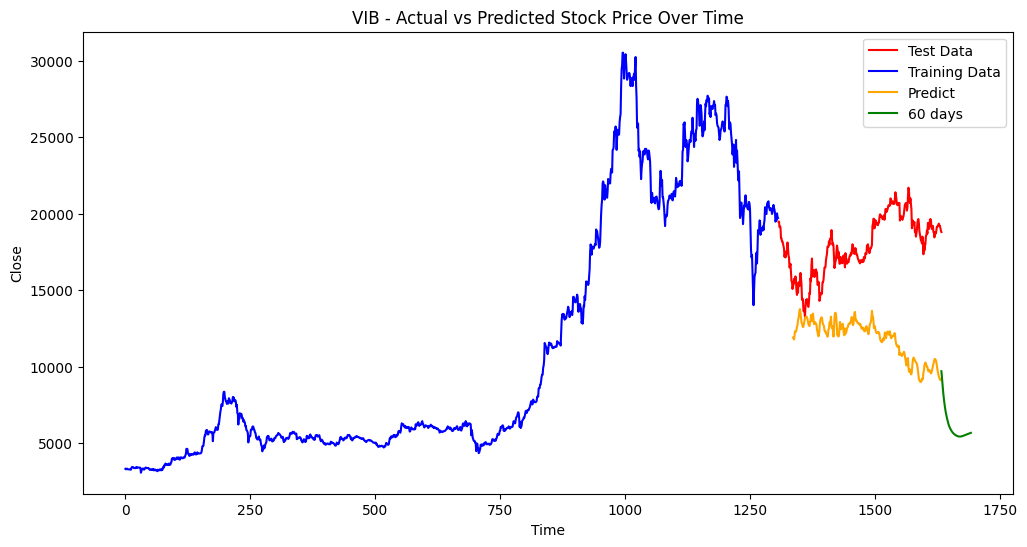

In [31]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), forecast_sum, linestyle='-', color='green', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [32]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))

print("RSME: ", RSME(pred_sum, test_sum[n_future:]))
print("MAE: ", MAE(pred_sum, test_sum[n_future:]))
print("MAPE: ", MAPE(pred_sum, test_sum[n_future:]))
print("MSLR: ", MSLE(pred_sum, test_sum[n_future:]))

RSME:  6747.454485980588
MAE:  6137.275443234427
MAPE:  32.94518612464585
MSLR:  0.2123514669644031
